K-최근접이웃(KNN) : 와인 등급 예측

목표: 와인 정보 데이터셋을 이용하여 와인의 등급 예측

via 최효원's Jupyter Notebook

총 세가지 등급으로 이루어진 와인의 정보를 담은 데이터셋입니다(알코올, 말산, 마그네슘 수치 등).

outlier 가 적은 데이터에 적합하고, 다중 분류 예측에 가장 간편히 활용할 수 있고, baseline 모델로 사용되는
KNN 알고리즘을 데이터셋에 적용 후, 와인 등급을 예측하기 위한 작업을 진행했습니다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#라이브러리 import

df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv')
#데이터 출처 : https://media.githubusercontent.com/media/musthave-ML10
df.head()
#알코올(도수) #말산 #증발/소각 후 남은 무기물 #마그네슘 #전체 페놀 #플라보노이드(색소)
#비색소 페놀 #프로안토시아닌 #색상 강도 #색조 #희석된 와인 담백질 함량 #프롤린 #와인 등급(target 변수)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [18]:
df.info()
#total 178 rows / 14 cols
#알코올(도수), 비색소 페놀 변수에서 각각 2개, 5개의 결측치가 확인됐습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         176 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null int64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            173 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null int64
class                           178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [19]:
df.describe()
#데이터 통계 정보
#거리 기반 알고리즘인 KNN 적용에 변수 값의 범위(scale) 차이는 치명적임,
#scaling 작업이 필요할 것으로 예상됩니다.
#color intensity 변수에서 비교적 고르게 값이 증가하다가 최댓값에서 값이 2배로 뜀
#(outlier 가능성)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [20]:
df['class'].unique()
#타겟 변수의 고윳값 확인

array([0, 1, 2])

In [21]:
df['class'].nunique()

3

In [22]:
df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

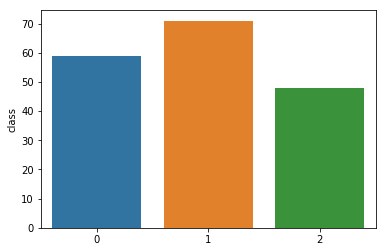

In [23]:
sns.barplot(x = df['class'].value_counts().index, y = df['class'].value_counts())
#타겟 변수에 대한 막대 그래프 생성 및 출력(barplot 활용)



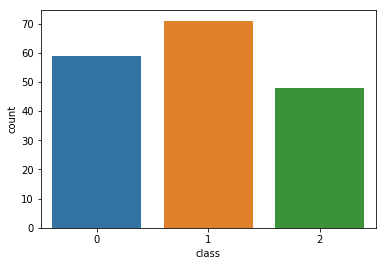

In [24]:
sns.countplot(df['class'])
#countplot 활용



In [25]:
df.isna()
#결측치 - True 로 출력

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.sum()
#컬럼별 수치 합게

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [27]:
df.isna().sum()
#컬럼별 결측치 개수 합

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [28]:
df.mean()
#컬럼별 평균값

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [29]:
df.isna().mean()
#결측치 비율 확인

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [30]:
df.dropna()
# 결측치가 있는 행 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.750000,1.25,3.17,1510,0
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.000000,1.17,2.82,1280,0


In [31]:
df.dropna().isna().mean() # 결측치 있는 행이 모두 지워져 결측치가 확인되지 않음
# df = df.dropna()
# df = df.dropna(inplace = True)    이런 방식으로 결측치가 있는 행을 완전히 지운다음 다시 df 변수를 업데이트 할 수 있다

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [32]:
df.dropna(subset=['alcohol'])
#지정된 변수의 결측치 행만 제거 - alcohol행에 결측치가 있는 2줄을 삭제

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.750000,1.25,3.17,1510,0
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.000000,1.17,2.82,1280,0


In [33]:
df.dropna(subset=['alcohol']).isna().mean()
#alcohol행에서는 결측치 없음. phenols행에서는 여전히 있음

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [34]:
#결측 변수 제거
df.drop(['alcohol','nonflavanoid_phenols'], axis = 1)
# 칼럼의 수가 14에서 12로 줄어듦

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.640000,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.380000,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.680000,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.800000,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.320000,1.04,2.93,735,0
5,1.76,2.45,15.2,112,3.27,3.39,1.97,6.750000,1.05,2.85,1450,0
6,1.87,2.45,14.6,96,2.50,2.52,1.98,5.250000,1.02,3.58,1290,0
7,2.15,2.61,17.6,121,2.60,2.51,1.25,5.050000,1.06,3.58,1295,0
8,1.64,2.17,14.0,97,2.80,2.98,1.98,5.200000,1.08,2.85,1045,0
9,1.35,2.27,16.0,98,2.98,3.15,1.85,7.220000,1.01,3.55,1045,0


In [35]:
#결측값 채우기
df.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,0
8,-99.00,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0


In [36]:
df.fillna(df.mean())
#각각의 컬럼의 평균값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,0
5,14.200000,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,0
6,14.390000,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,0
7,14.060000,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,0
8,12.989091,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,0
9,13.860000,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0


In [37]:
df.fillna(df.median(), inplace = True)  #inplace 매개변수로 결측치 채운 결과로 바로 df가 업데이트됨.
df.isna().mean()
#outlier 에 조금 덜 민감한 중윗값(median 값으로 대체)

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#스케일러 import
#standard - 평균/ 표준편차 이용
#MinMax - 최대/ 최소 이용
#Robust - 사분위값 이용




In [39]:
st_scaler = StandardScaler()


In [40]:
st_scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
st_scaled = st_scaler.transform(df)


In [44]:
st_scaled


array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [45]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
5,1.517239,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.175245,0.664217,0.731870,0.406051,0.336606,2.239039,-1.213944
6,1.755438,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.497658,0.681738,0.083015,0.274431,1.367689,1.729520,-1.213944
7,1.341723,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417055,-0.597284,-0.003499,0.449924,1.367689,1.745442,-1.213944
8,0.075503,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578262,0.681738,0.061386,0.537671,0.336606,0.949319,-1.213944
9,1.090986,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.142486,0.453967,0.935177,0.230557,1.325316,0.949319,-1.213944


In [46]:
st_scaled = pd.DataFrame(st_scaled, columns = df.columns)

In [47]:
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
5,1.517239,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.175245,0.664217,0.731870,0.406051,0.336606,2.239039,-1.213944
6,1.755438,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.497658,0.681738,0.083015,0.274431,1.367689,1.729520,-1.213944
7,1.341723,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417055,-0.597284,-0.003499,0.449924,1.367689,1.745442,-1.213944
8,0.075503,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578262,0.681738,0.061386,0.537671,0.336606,0.949319,-1.213944
9,1.090986,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.142486,0.453967,0.935177,0.230557,1.325316,0.949319,-1.213944


In [48]:
round(st_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [49]:
rb = RobustScaler()



In [50]:
rb_scaled= rb.fit_transform(df)


In [51]:
rb_scaled = pd.DataFrame(rb_scaled, columns = df.columns)
rb_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.907692,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050,-0.5
1,0.000000,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090,-0.5
2,0.084615,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728,-0.5
3,1.015385,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603,-0.5
4,0.146154,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935,-0.5
5,0.884615,-0.070946,0.258993,-1.000000,0.736842,0.865248,0.751497,0.000000,0.592857,0.691275,0.251852,0.056795,1.602683,-0.5
6,1.030769,0.003378,0.258993,-1.139535,-0.105263,0.137116,0.230539,-0.238806,0.607143,0.187919,0.162963,0.649087,1.272446,-0.5
7,0.776923,0.192568,0.719424,-0.441860,1.210526,0.231678,0.224551,-0.179104,-0.435714,0.120805,0.281481,0.649087,1.282766,-0.5
8,0.000000,-0.152027,-0.546763,-1.279070,-0.052632,0.420804,0.505988,-0.298507,0.607143,0.171141,0.340741,0.056795,0.766770,-0.5
9,0.623077,-0.347973,-0.258993,-0.813953,0.000000,0.591017,0.607784,-0.716418,0.421429,0.848993,0.133333,0.624746,0.766770,-0.5


In [52]:
round(rb_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [54]:
mm = MinMaxScaler()

In [55]:

mm_scaled = mm.fit_transform(df)
mm_scaled = pd.DataFrame(mm_scaled, columns = df.columns)
round(mm_scaled.describe(),2)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [56]:
from sklearn.model_selection import train_test_split
#독립 변수, 종속 변수 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis = 1),df['class'], test_size = 0.2, random_state=100)



In [57]:
mm = MinMaxScaler()
mm.fit(X_train)
#데이터 특성을 그대로 보존하는 최대-최소 스케일러 사용

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)



In [68]:
from sklearn.neighbors import KNeighborsClassifier
#KNN분류 알고리즘 import
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
#knn 모델 생성, n_neighbors 의 기본값은 5, 7로 임의 설정하여 모델링

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
pred = knn.predict(X_test_scaled)
pred
#예측

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)


0.8888888888888888

In [72]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

*n_neighbors = 7 로 설정 후 모델링 결과, 와인 등급 예측 정확도가 약 92% 정도로 측정됐습니다.

In [74]:
#for 문을 활용한 하이퍼파라미터 튜닝, 모델링 및 정확도 측정 일괄 계산
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    print(accuracy_score(y_test, pred))



0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


In [81]:
scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    scores.append(acc)
   
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

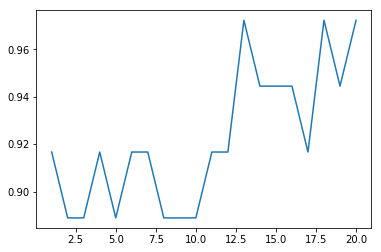

In [83]:
#n_neighbors 갯수별 정확도 시각화


#선형그래프 활용
sns.lineplot(x=range(1,21), y=scores)


*n_neighbors = 13 이후로 더 나은 개선은 보이지 않으므로,
13이 합리적인 하이퍼파라미터로 확인됐습니다.

In [84]:
#remodeling

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)


0.9722222222222222

*최종 와인 예측 모델의 정확도 약 97%로 성능이 개선된 것을 확인했습니다.